In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
# training data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# params
lr = 0.01
display_step = 100
epochs = 1000

In [4]:
# randomly defined weight and bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

In [5]:
def linear_regression(inputs):
    # y = mx + b
    return inputs * W + b

def mean_square_func(model_func, inputs, labels):
    eqn = tf.reduce_sum(tf.pow(model_func(inputs) - labels, 2)) / (2 * n_samples)
    return eqn

In [6]:
# sgd
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

# compute gradiens
grad = tfe.implicit_gradients(mean_square_func)

Inital W= <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.039179854>
Inital b= <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.38617828>
Initial cost= 3.3465845584869385

Done!

W= <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.2990518>
b= <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4626371>
Cost= 0.0839238166809082



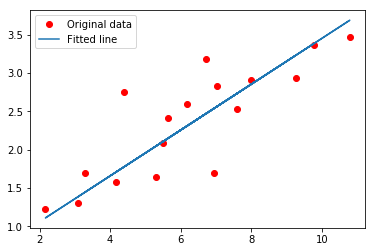

In [7]:
init_cost = mean_square_func(linear_regression, train_X, train_Y)

print("Inital W= {}" .format(W))
print("Inital b= {}" .format(b))
print("Initial cost= {}\n" .format(init_cost))


for step in range(epochs):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

final_cost = mean_square_func(linear_regression, train_X, train_Y)

print('Done!\n')
print("W= {}" .format(W))
print("b= {}" .format(b))
print("Cost= {}\n" .format(final_cost))

plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()
